## Компьютерное зрение в робототехнике | Домашнее задание 2

В этом домашнем задании нужно будет реализовать подсчет числа пальцев, которые показывает человек на видео fingers.mov из папки data.

Для удобства реализации значительная часть кода уже написана. Внимательно изнакомьтесь с заготовками, поймите, что происходит в коде и для чего нужна каждая конкретная функция.

Есть много вариантов, как можно подступиться к этой задаче. Приведем некоторые из них:

**Скелетонизация**
- получение маски
- обработка (фильтрация шумов, сглаживание)
- удаление всего, кроме самой большой связной компоненты
- скелетонизация (можно загуглить opencv skeletonization)
- нахождение кончиков пальцев (filter2d)
- фильтрация кончиков пальцев

**Дефекты выпуклости**
- получение маски
- обработка (фильтрация шумов, сглаживание)
- удаление всего, кроме самой большой связной компоненты
- нахождение контура, построение грубой аппроксимации
- нахождение дефектов выпуклости (convexity defects)

**Морфология**
- получение маски
- обработка (фильтрация шумов, сглаживание)
- удаление всего, кроме самой большой связной компоненты
- морфологические операции top hat/black hat

Можно выбрать любой из этих способов, который по душе, или придумать свой. Нейронные сети и другие методы машинного обучения использовать в решении нельзя :)

***

<h2 style="color:#A7BD3F;">Секция 1: подготовка</h2>

Этот код представляет из себя в сущности обертку над функцией обработки кадра. Завершение выполнения производится с помощью нажатия кнопки 'q' (работает только для английского языка).

In [1]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import cv2

class FrameProcessor:
    def __init__(self):
        pass
    
    def processing_loop(self, source, lth, hth, max_frame_num = -1,\
                        alternative_source="", save_to_file=""):
        i = 0
        results = []

        output_file = None
        
        
        while (True):
            retval, frame = source.read()

            if (retval == False):
                print("Cannot read frame")
                
                if (alternative_source != ""):
                    print("Opening alternative source ", alternative_source)
                    source = cv2.VideoCapture(alternative_source)
                    continue
                
                else:
                    print("Exiting loop")
                    break

            result = self.process_frame(frame, lth, hth)
            
            results.append(result)

            key = cv2.waitKey(100) & 0xFF

            i += 1

            if (key == ord('q')):
                break
                        
            if (max_frame_num != -1 and i >= max_frame_num):
                break

        return results
    
    def process_frame(self, frame, lth, hth):
        return 5

In [9]:
import cv2 
import numpy as np
def filter_cc(mask, area_th = -1):
    connectivity = 4
    output = cv2.connectedComponentsWithStats(mask, connectivity, cv2.CV_32S)
    num_labels = output[0]
   # print(num_labels)
    labels = output[1]
    stats = output[2]
        #centroids = output[3]

    if (num_labels < 1):
        return mask
        
    if (area_th == -1):
        max_area = 1
        max_label = 1
            
        for i in range(1, num_labels):
            area = stats[i, cv2.CC_STAT_AREA]
                
            if (area > max_area):
                max_area = area
                max_label = i
            
        for i in range(1, len(stats)):
            if (i != max_label):
                mask[np.where(labels == i)] = 0
                    
    else:
        for i in range(len(stats)):
            area = stats[i, cv2.CC_STAT_AREA]

            if (area < area_th):
                mask[np.where(labels == i)] = 0

    return mask

***

<h2 style="color:#A7BD3F;">Секция 2: настройка цветового фильтра</h2>

Настройте параметры фильтрации по цвету. Это нужно делать в цветовом пространстве *HSV*. После этого запишите найденные параметры в *lth* и *hth*, их можно будет использовать позже.

In [10]:
#############################################
# YOUR DEFAULT PARAMETERS BELOW
#############################################

lth, hth = (0, 88, 97), (255, 255, 255)

#############################################
# YOUR DEFAULT PARAMETERS ABOVE
#############################################

class ColorFilterTuning(FrameProcessor):
    def __init__(self):
        super().__init__()
        
        cv2.namedWindow("color_filter_parameters")
                
        cv2.createTrackbar('rl', 'color_filter_parameters', lth[0], 255, self.nothing)
        cv2.createTrackbar('gl', 'color_filter_parameters', lth[1], 255, self.nothing)
        cv2.createTrackbar('bl', 'color_filter_parameters', lth[2], 255, self.nothing)
        cv2.createTrackbar('rh', 'color_filter_parameters', hth[0], 255, self.nothing)
        cv2.createTrackbar('gh', 'color_filter_parameters', hth[1], 255, self.nothing)
        cv2.createTrackbar('bh', 'color_filter_parameters', hth[2], 255, self.nothing)

    def nothing(self, inp):
        pass
    
    def process_frame(self, frame, lth, hth):
        hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
        
        low_th =  (cv2.getTrackbarPos('rl', 'color_filter_parameters'),
                   cv2.getTrackbarPos('gl', 'color_filter_parameters'),
                   cv2.getTrackbarPos('bl', 'color_filter_parameters'))
        
        high_th = (cv2.getTrackbarPos('rh', 'color_filter_parameters'),
                   cv2.getTrackbarPos('gh', 'color_filter_parameters'),
                   cv2.getTrackbarPos('bh', 'color_filter_parameters'))
        
        mask = cv2.inRange(frame, low_th, high_th)
        
        cv2.imshow("frame", frame)
        cv2.imshow("mask", mask)
        
        return (low_th, high_th)

In [5]:
!git clone https://github.com/StarkitRobots/cvr_course.git

Cloning into 'cvr_course'...
remote: Enumerating objects: 562, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 562 (delta 0), reused 4 (delta 0), pack-reused 555
Receiving objects: 100% (562/562), 69.95 MiB | 45.36 MiB/s, done.
Resolving deltas: 100% (139/139), done.


In [6]:
import numpy as np
import cv2

video_file = "cvr_course/data/videos/fingers.mov"

cam = cv2.VideoCapture(video_file)

***

<h2 style="color:#A7BD3F;">Секция 3: подсчет пальцев</h2>

Реализуйте алгоритм нахождения числа пальцев, закомментировав функцию, которая всегда возвращает 3 и написав свою. Вы можете использовать *lth* и *hth*, которые получили выше. Заготовленные функции для обработки масок можно использовать, а можно и не использовать.

In [11]:
class FingersCounter(FrameProcessor):
    def __init__(self):
        super().__init__()

   
    def process_frame(self, img, lth, hth):
        #############################################
        # YOUR CODE BELOW
        #############################################
        img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        ret, thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
        img = filter_cc(thresh)
        
        img = img[180:580, 600:1000] 
    
        contours,_ = cv2.findContours(img,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

        max=0
        sel_countour=None
        for countour in contours:
            if countour.shape[0]>max:
                sel_countour=countour
                max=countour.shape[0]

        arclen = cv2.arcLength(sel_countour, True)

        # approx
        eps =  0.01
        epsilon = arclen * eps
        approx = cv2.approxPolyDP(sel_countour, epsilon, True)

     
        img_contours = np.uint8(np.zeros((img.shape[0],img.shape[1])))
        cv2.drawContours(img_contours, [approx], -1, (255,255,255), 1)
        

        #cv2.imshow('contours', img_contours) # выводим итоговое изображение в окно
        #cv2.waitKey(0)
        
        fingers_num = approx.shape[0]

        if (approx.shape[0] >=15):
            fingers_num  =5
        elif ((approx.shape[0] >=9)&(approx.shape[0] <=10) | (approx.shape[0]==4)):   
            fingers_num  =0
        elif ((approx.shape[0] >=14)&(approx.shape[0] <=15) | (approx.shape[0]==18)): 
            fingers_num  =4
        elif (approx.shape[0] ==13): 
            fingers_num  =1    
        else:
            fingers_num  =2   
        
        
        #НИЖЕ МОИ ДРУГИЕ ПОПЫТКИ , НА НИХ МОЖНО НЕ СМОТРЕТЬ
        
        
       # cv2.imshow('contours', img_contours) 

        #cv2.waitKey(0)
       # print(img_contours.shape)
        #cropped = img_contours[180:580, 400:1000]
       # cv2.imshow("cropped", cropped )
       # cv2.waitKey(0)
        #cv2.destroyAllWindows()        
        # здесь надо удалить контуры доски
        '''  kernel =kernel = np.array([[10, -10, -10, -10, -10], 
                                   [-10, -10, -10, -10, -10], 
                                   [-10, -10, 10, -10, -10], 
                                   [-10, -10, -10,-10, -10], 
                                   [10, -10,  -10,  -10, -10]])

        resulti
        ng_image = cv2.filter2D(img_contours, -1, kernel)
        cv2.imshow("filter2d image", resulting_image)
        cv2.waitKey()
        cv2.destroyAllWindows()
        contours,_ = cv2.findContours(cropped,2,1)
       # print (contours[0])
       
        cnt = contours[0]
        
 
        
       
       # cnt = approx
       # print (approx.shape[0])
        hull = cv2.convexHull(cnt,returnPoints = False)
        defects = cv2.convexityDefects(cnt,hull)
        for i in range(defects.shape[0]):
            s,e,f,d = defects[i,0]
            start = tuple(cnt[s][0])
            end = tuple(cnt[e][0])
            far = tuple(cnt[f][0])
            cv2.line(cropped,start,end,[200,255,200],2)
            cv2.circle(cropped,far,5,[200,200,255],-1)
 
       # cv2.imshow('final_img',cropped)
        #cv2.waitKey(0)
        
        fingers_num  = defects.shape[0]
          for i in range (defects.shape[0]):
            if defects[i,:,3] >300 :
                fingers_num += 1
        print (defects[:,:,3])'''
        # cv2.imshow('origin', canvas) # выводим итоговое изображение в окно
        #cv2.imshow('res', img_contours) # выводим итоговое изображение в окно

        #cv2.waitKey()'''
        #############################################
        # YOUR CODE ABOVE
        #############################################
        
    #    cv2.imshow("stages", stages_concat)
      #  fingers_num = approx.shape[0] - 9 
        
        
        return fingers_num

In [12]:
cam = cv2.VideoCapture(video_file)


finger_counter = FingersCounter()

fingers_num = finger_counter.processing_loop(cam, lth, hth) 

print(fingers_num)

Cannot read frame
Exiting loop
[5, 5, 0, 0, 0, 5, 5, 5, 0, 0, 0, 5, 5, 5, 5, 4, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 4, 1, 5, 5, 5, 4, 4, 5, 4, 2, 1, 5, 5, 5, 5, 1, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 5, 2, 0, 0, 0, 0, 0]


***

<h2 style="color:#A7BD3F;">Секция 4: оценивание</h2>

Решение, дающее значения метрики *accuracy* *0.5* и более, оцениваются полным баллом с линейной интерполяцией в области меньших значений.

Выполните эту клетку для получения своей оценки, изучите, как она была посчитана. Если в процессе выполнения задания появились вопросы или проблемы, пишите в чат или @elijahmipt в телеграме.

In [13]:
reference_fingers_num = [5, 5, 1, 0, 0, 5, 5, 5, 0, 0, 0, 5, 5, 5, 5, 4, 3, 3,\
                         3, 3, 3, 3, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2,\
                         2, 2, 2, 2, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5,\
                         2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,\
                         2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1,\
                         3, 4, 0, 0, 0, 1]

max_grade = 100

corr_num = 0

for r, s in zip(reference_fingers_num, fingers_num):
    if (r == s):
        corr_num += 1

acc = corr_num / len(reference_fingers_num)
#print("correct ", corr_num, " out of ", len(reference_fingers_num),
#      corr_num / len(reference_fingers_num))

grade = min(acc * 2, 1) * max_grade

print("Your grade is ", "\033[92m{}\033[0m".format(str(int(grade)) +\
        " out of " + str(max_grade) + "; " + str(corr_num) + " frames out of "
        + str(len(reference_fingers_num))))

Your grade is  100 out of 100; 52 frames out of 96


In [14]:
acc

0.5416666666666666

Примечание : я пробовала разными способами, через ConvexHull у меня не получилось корректно определить дефекты, он либо говорил о пересечениях контура, либо обводил только доску, что логично . Пробовала аппроксимированный контур прогнать через фильтр 2d , но не получилось подобрать , чтобы все было видно , что мне нужно. В итоге остановилась на approxPolyDP над обрезанной картинкой , если не обрезать , то там все едет по количеству, ведь здесь счет на каждую точку идет . Подбор трэшхолдов я вручную сделала по своим картинкам . Зависимость почти линейная. Только вот тройки моя программа не любит , с ними получается та же характеристика, что и для единичек :( Тем не менее, accuracy = 0.54 


Еще у меня была идея сделать функцию, считающую количество углов в контуре меньше примерно 50-60 градусов, тогда бы работало тоже, но я не знаю пока как это делается корректно 

Ps :  делала в Jupiter сначала



Ниже картинки, по которым я оценивала ( в коде я закомментировала их вывод, чтоб не мешало )

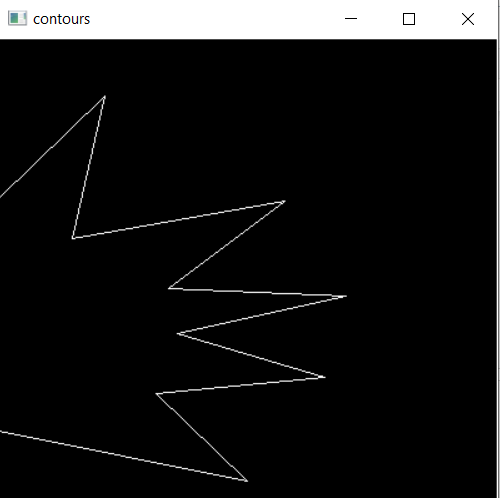

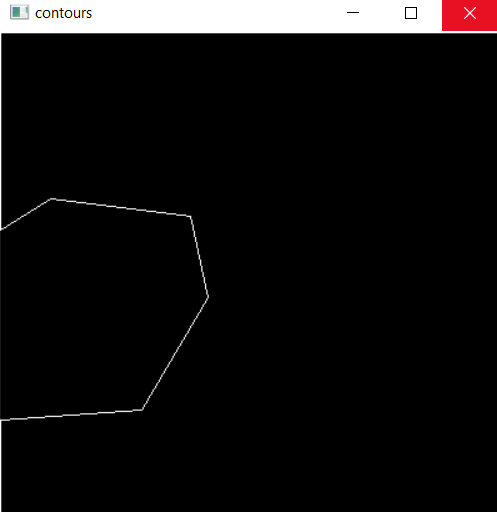

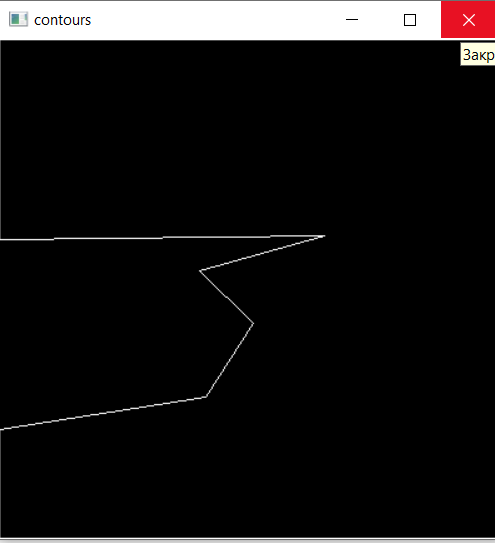